---
### Applying Log Transform on Yelp Reviews to Predict Average Business Rating
---

In [1]:
# Import Library

import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

In [2]:
# Load business data 

biz_data = open('../data/yelp_dataset/yelp_academic_dataset_business.json', 
                        encoding='utf-8')

In [3]:
# create a pandas dataframe of the data

bizdf = pd.DataFrame([json.loads(x) for x in biz_data.readlines()])
biz_data.close()

In [4]:
## Compute the log transform of the review count

bizdf['log_review_count'] = np.log10(bizdf['review_count'] + 1)

In [5]:
bizdf[:3].T

,0,1,2
address,1314 44 Avenue NE,,1335 rue Beaubien E
attributes,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","{'Alcohol': 'none', 'BikeParking': 'False', 'B...","{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro..."
business_id,Apn5Q_b6Nz61Tq4XzPdf9A,AjEbIBw6ZFfln7ePHha9PA,O8S5hYJ1SMc8fA4QBtVujA
categories,"Tours, Breweries, Pizza, Restaurants, Food, Ho...","Chicken Wings, Burgers, Caterers, Street Vendo...","Breakfast & Brunch, Restaurants, French, Sandw..."
city,Calgary,Henderson,Montréal
hours,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
is_open,1,0,0
latitude,51.0918,35.9607,45.5405
longitude,-114.032,-114.94,-73.5993
name,Minhas Micro Brewery,CK'S BBQ & Catering,La Bastringue


#### Using Log Transform

Text(0,0.5,'Occurrence')

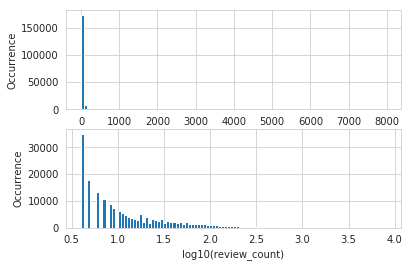

In [6]:
# Visualizing the distribution of review counts before and after appying the log transform

fig, (ax1,ax2) = plt.subplots(2,1)
bizdf['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=10)
ax1.set_xlabel('review_count', fontsize=10)
ax1.set_ylabel('Occurrence', fontsize=10)

bizdf['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=10)
ax2.set_xlabel('log10(review_count)', fontsize=10)
ax2.set_ylabel('Occurrence', fontsize=10)

In [7]:
# Import sklearn to create model Machine Learning

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [8]:
# Train Linear Regression models to predict the average star rating of a business

model = linear_model.LinearRegression()
scores = cross_val_score(model, bizdf[['review_count']], bizdf['stars'], cv=10)

log_model = linear_model.LinearRegression()
log_scores = cross_val_score(log_model, bizdf[['log_review_count']], bizdf['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (log_scores.mean(), log_scores.std() * 2))

R-squared score without log transform: 0.00085 (+/- 0.00137)
R-squared score with log transform: 0.00236 (+/- 0.00124)
